# Using the XApRES package
A guide to using the package XApRES to load and package together timeseries of ApRES datasets. 

## Load the package and set up workspace

In [1]:
import sys
import os
from pathlib import Path
path = Path(sys.path[0])
sys.path.append(os.path.join(path.parent.parent.absolute(),'src','XApRES'))
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt


In [2]:
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    16:54:29 	 ApRESDefs.py @function _setup_logging line 494 - Stream logging level set to DEBUG
DEBUG    16:54:29 	 ApRESDefs.py @function _setup_logging line 495 - Add console handler to logger
DEBUG    16:54:29 	 ApRESDefs.py @function _setup_logging line 508 - File logging level set to DEBUG


In [3]:
filepaths = xa.list_files(directory='gs://ldeo-glaciology/GL_apres_2022', remote_load = True)
filepaths[0:5]

DEBUG    16:54:29 	 ApRESDefs.py @function list_files line 165 - Find all the dat files in the directory gs://ldeo-glaciology/GL_apres_2022 with remote_load = True
DEBUG    16:54:36 	 ApRESDefs.py @function list_files line 179 - Finish call to list_files. Found 386 files


['ldeo-glaciology/GL_apres_2022/A101/CardA/DIR2022-05-22-1939/DATA2022-05-22-1939.DAT',
 'ldeo-glaciology/GL_apres_2022/A101/CardA/DIR2022-05-26-1530/DATA2022-05-26-1530.DAT',
 'ldeo-glaciology/GL_apres_2022/A101/CardA/DIR2022-05-26-1536/DATA2022-05-26-1536.DAT',
 'ldeo-glaciology/GL_apres_2022/A101/CardA/DIR2022-05-26-1536/DATA2022-05-27-1506.DAT',
 'ldeo-glaciology/GL_apres_2022/A101/CardA/DIR2022-05-26-1536/DATA2022-05-28-1436.DAT']

## Load 3 Bursts

In [11]:
%%time 
import importlib
importlib.reload(ApRESDefs)  
xa = ApRESDefs.xapres(loglevel='debug', max_range=1400)
xa.load_all(directory='gs://ldeo-glaciology/GL_apres_2022', 
            remote_load = True,
            file_numbers_to_process = [1,2,3,200], 
            bursts_to_process=[0,1]
           )
xa.data

DEBUG    16:59:36 	 ApRESDefs.py @function _setup_logging line 494 - Stream logging level set to DEBUG
DEBUG    16:59:36 	 ApRESDefs.py @function _setup_logging line 495 - Add console handler to logger
DEBUG    16:59:36 	 ApRESDefs.py @function _setup_logging line 508 - File logging level set to DEBUG
DEBUG    16:59:36 	 ApRESDefs.py @function list_files line 165 - Find all the dat files in the directory gs://ldeo-glaciology/GL_apres_2022 with remote_load = True
DEBUG    16:59:38 	 ApRESDefs.py @function list_files line 179 - Finish call to list_files. Found 386 files
DEBUG    16:59:38 	 ApRESDefs.py @function load_all line 211 - Subset files to [1, 2, 3, 200]
DEBUG    16:59:38 	 ApRESDefs.py @function load_all line 227 - Starting loop over dat files
DEBUG    16:59:38 	 ApRESDefs.py @function load_all line 230 - Load dat file ldeo-glaciology/GL_apres_2022/A101/CardA/DIR2022-05-26-1530/DATA2022-05-26-1530.DAT
DEBUG    16:59:38 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 2

DEBUG    17:00:49 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 260 - bursts_to_process = [0, 1] at the start of _all_bursts_in_dat_to_xarray.
DEBUG    17:00:49 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 273 - bursts_to_process = [0, 1] after initial parse in _all_bursts_in_dat_to_xarray.
DEBUG    17:00:49 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 275 - Start loop over burst numbers [0, 1] in dat file ldeo-glaciology/GL_apres_2022/A103/CardA/DIR2022-07-19-1354/DATA2022-07-31-0755.DAT
DEBUG    17:00:49 	 ApRESDefs.py @function _all_bursts_in_dat_to_xarray line 280 - Extract burst number 0
DEBUG    17:00:50 	 ApRESDefs.py @function _burst_to_xarray line 296 - Put all chirps and profiles from burst number 0 in 3D arrays
DEBUG    17:00:50 	 ApRESDefs.py @function _burst_to_3d_arrays line 349 - Set max range from _burst_to_3d_arrays
DEBUG    17:00:50 	 ApRESDefs.py @function _set_max_range line 405 - Max_range has been set to 1400
DEBUG    17:00

<xarray.Dataset>
Dimensions:          (time: 7, chirp_time: 40001, chirp_num: 20,
                      attenuator_setting_pair: 2, profile_range: 6658)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-26T15:31:02 ... 2022-07-31...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
    filename         (time) <U83 'ldeo-glaciology/GL_apres_2022/A101/CardA/DI...
    burst_number     (time) int64 0 0 1 0 1 0 1
    AFGain           (attenuator_setting_pair) int64 -4 -14
    attenuator       (attenuator_setting_pair) float64 5.0 5.0
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 ...
    profile          (time, profile_range, chirp_num, attenuator_setting_pair) complex128 ...
    latitude         (time) float64 68.71 68.71 68.71 68.71 68.71 68.74 68.74
    longitude        (time) float64 -49.55 -49.55 -49.55 ... -49.49 -49.49
    battery_voltage  (time) float64 13.93 13.91 13.88 13.61 13.56 13.7 13.69
    temperature_1    (time) float64 2.812 3.008 4.773 8.5 7.32 5.859 5.266
    temperature_2    (time) float64 2.25 2.648 1.664 9.125 6.766 3.422 3.812

## Stack bursts

Text(0.5, 1.0, 'Range Profiles')

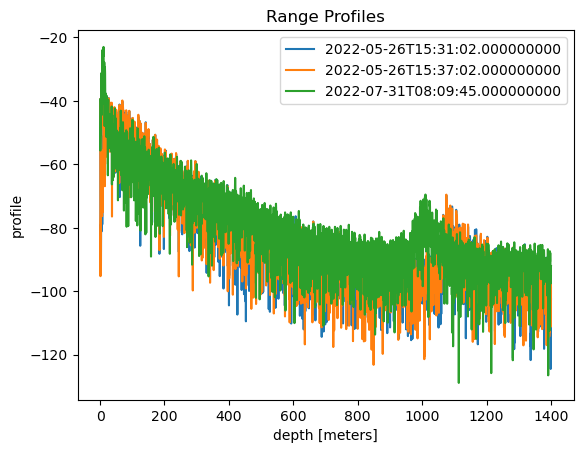

In [20]:
# stack the data (this line stacks both the chirps and the profiles, but you could just do the profiles)
stacked1 = xa.data.isel(time=0, attenuator_setting_pair=0).mean(dim='chirp_num')
stacked2 = xa.data.isel(time=1, attenuator_setting_pair=0).mean(dim='chirp_num')
stacked3 = xa.data.isel(time=6, attenuator_setting_pair=0).mean(dim='chirp_num')


xa.dB(stacked1.profile).plot(label=stacked1.profile.time.data)
xa.dB(stacked2.profile).plot(label=stacked2.profile.time.data)
xa.dB(stacked3.profile).plot(label=stacked3.profile.time.data)
plt.legend()
plt.title('Range Profiles')


## Calculate vertical velocities for a pair of stacked bursts
The function looks like `generate_range_diff(self, data1, data2, win_cor, step, range_ext=None, win_wrap=10, thresh=0.9, uncertainty='noise_phasor')`. Changing the window for the coherence and the step creates pretty different results.

INFO     17:02:59 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 360.0s
INFO     17:02:59 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 360.0s
INFO     17:03:00 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 360.0s
INFO     17:03:01 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 360.0s
INFO     17:03:02 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 360.0s
INFO     17:03:02 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 360.0s


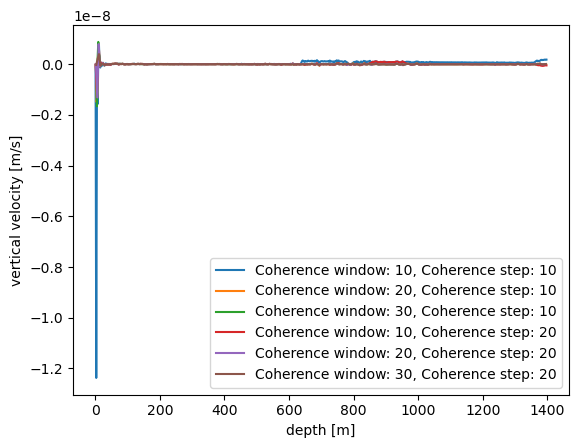

In [21]:
for step in [10,20]:
    for win in [10,20,30]:
        vels, ds = xa.generate_range_diff(stacked1.profile,stacked2.profile,win,step)
        plt.plot(ds,vels,label=f'Coherence window: {win}, Coherence step: {step}')
plt.xlabel('depth [m]')
plt.ylabel('vertical velocity [m/s]')
plt.legend()

With times split further apart, this windowing and step size has even more impact. 

INFO     17:05:14 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 5675923.0s
INFO     17:05:15 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 5675923.0s
INFO     17:05:16 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 5675923.0s
INFO     17:05:17 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 5675923.0s
INFO     17:05:17 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 5675923.0s
INFO     17:05:17 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : 5675923.0s


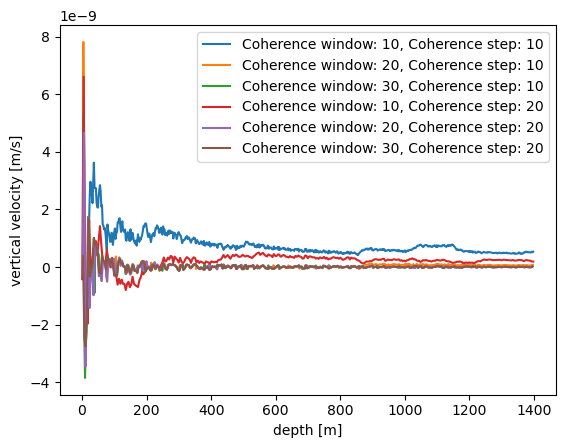

In [23]:
for step in [10,20]:
    for win in [10,20,30]:
        vels, ds = xa.generate_range_diff(stacked1.profile,stacked3.profile,win,step)
        plt.plot(ds,vels,label=f'Coherence window: {win}, Coherence step: {step}')
plt.xlabel('depth [m]')
plt.ylabel('vertical velocity [m/s]')
plt.legend()

## Testing with multiple bursts in data

Given the example below, clearly at the moment something causes the range_diff calculation to collapse, perhaps it doesn't like working with dimensions. A possible solution is to have a for loop iterating through each pair to compare. This is simple to implement, but could be annoying with big data (though I see that in generating the xarrays, there's for loops anyways). Another solution that I need to sleep on is to modify the calculations form ImpDAR to accomodate the xarray structure (since currently it is only operating with numpy arrays). This may be a bit trickier as in I can't think of the immediate implementation. 

In [24]:
stacked_arr1 = xa.data.isel(time=[0,1,2,3], attenuator_setting_pair=0).mean(dim='chirp_num')
stacked_arr2 = xa.data.isel(time=[1,2,3,4], attenuator_setting_pair=0).mean(dim='chirp_num')

In [25]:
vels, ds = xa.generate_range_diff(stacked_arr1.profile,stacked_arr2.profile,win,step)

INFO     17:05:39 	 ApRESDefs.py @function generate_range_diff line 585 - Time between bursts : [  360.   866. 83702.   897.]s


In [26]:
vels

<xarray.DataArray 'profile_range' (profile_range: 0)>
array([], dtype=float64)
Coordinates:
  * profile_range  (profile_range) float64 
    AFGain         int64 -4
    attenuator     float64 5.0

In [27]:
ds

<xarray.DataArray 'profile_range' (profile_range: 0)>
array([], dtype=float64)
Coordinates:
  * profile_range  (profile_range) float64 
    AFGain         int64 -4
    attenuator     float64 5.0
Attributes:
    long_name:  depth
    units:      meters